# Outline Cards

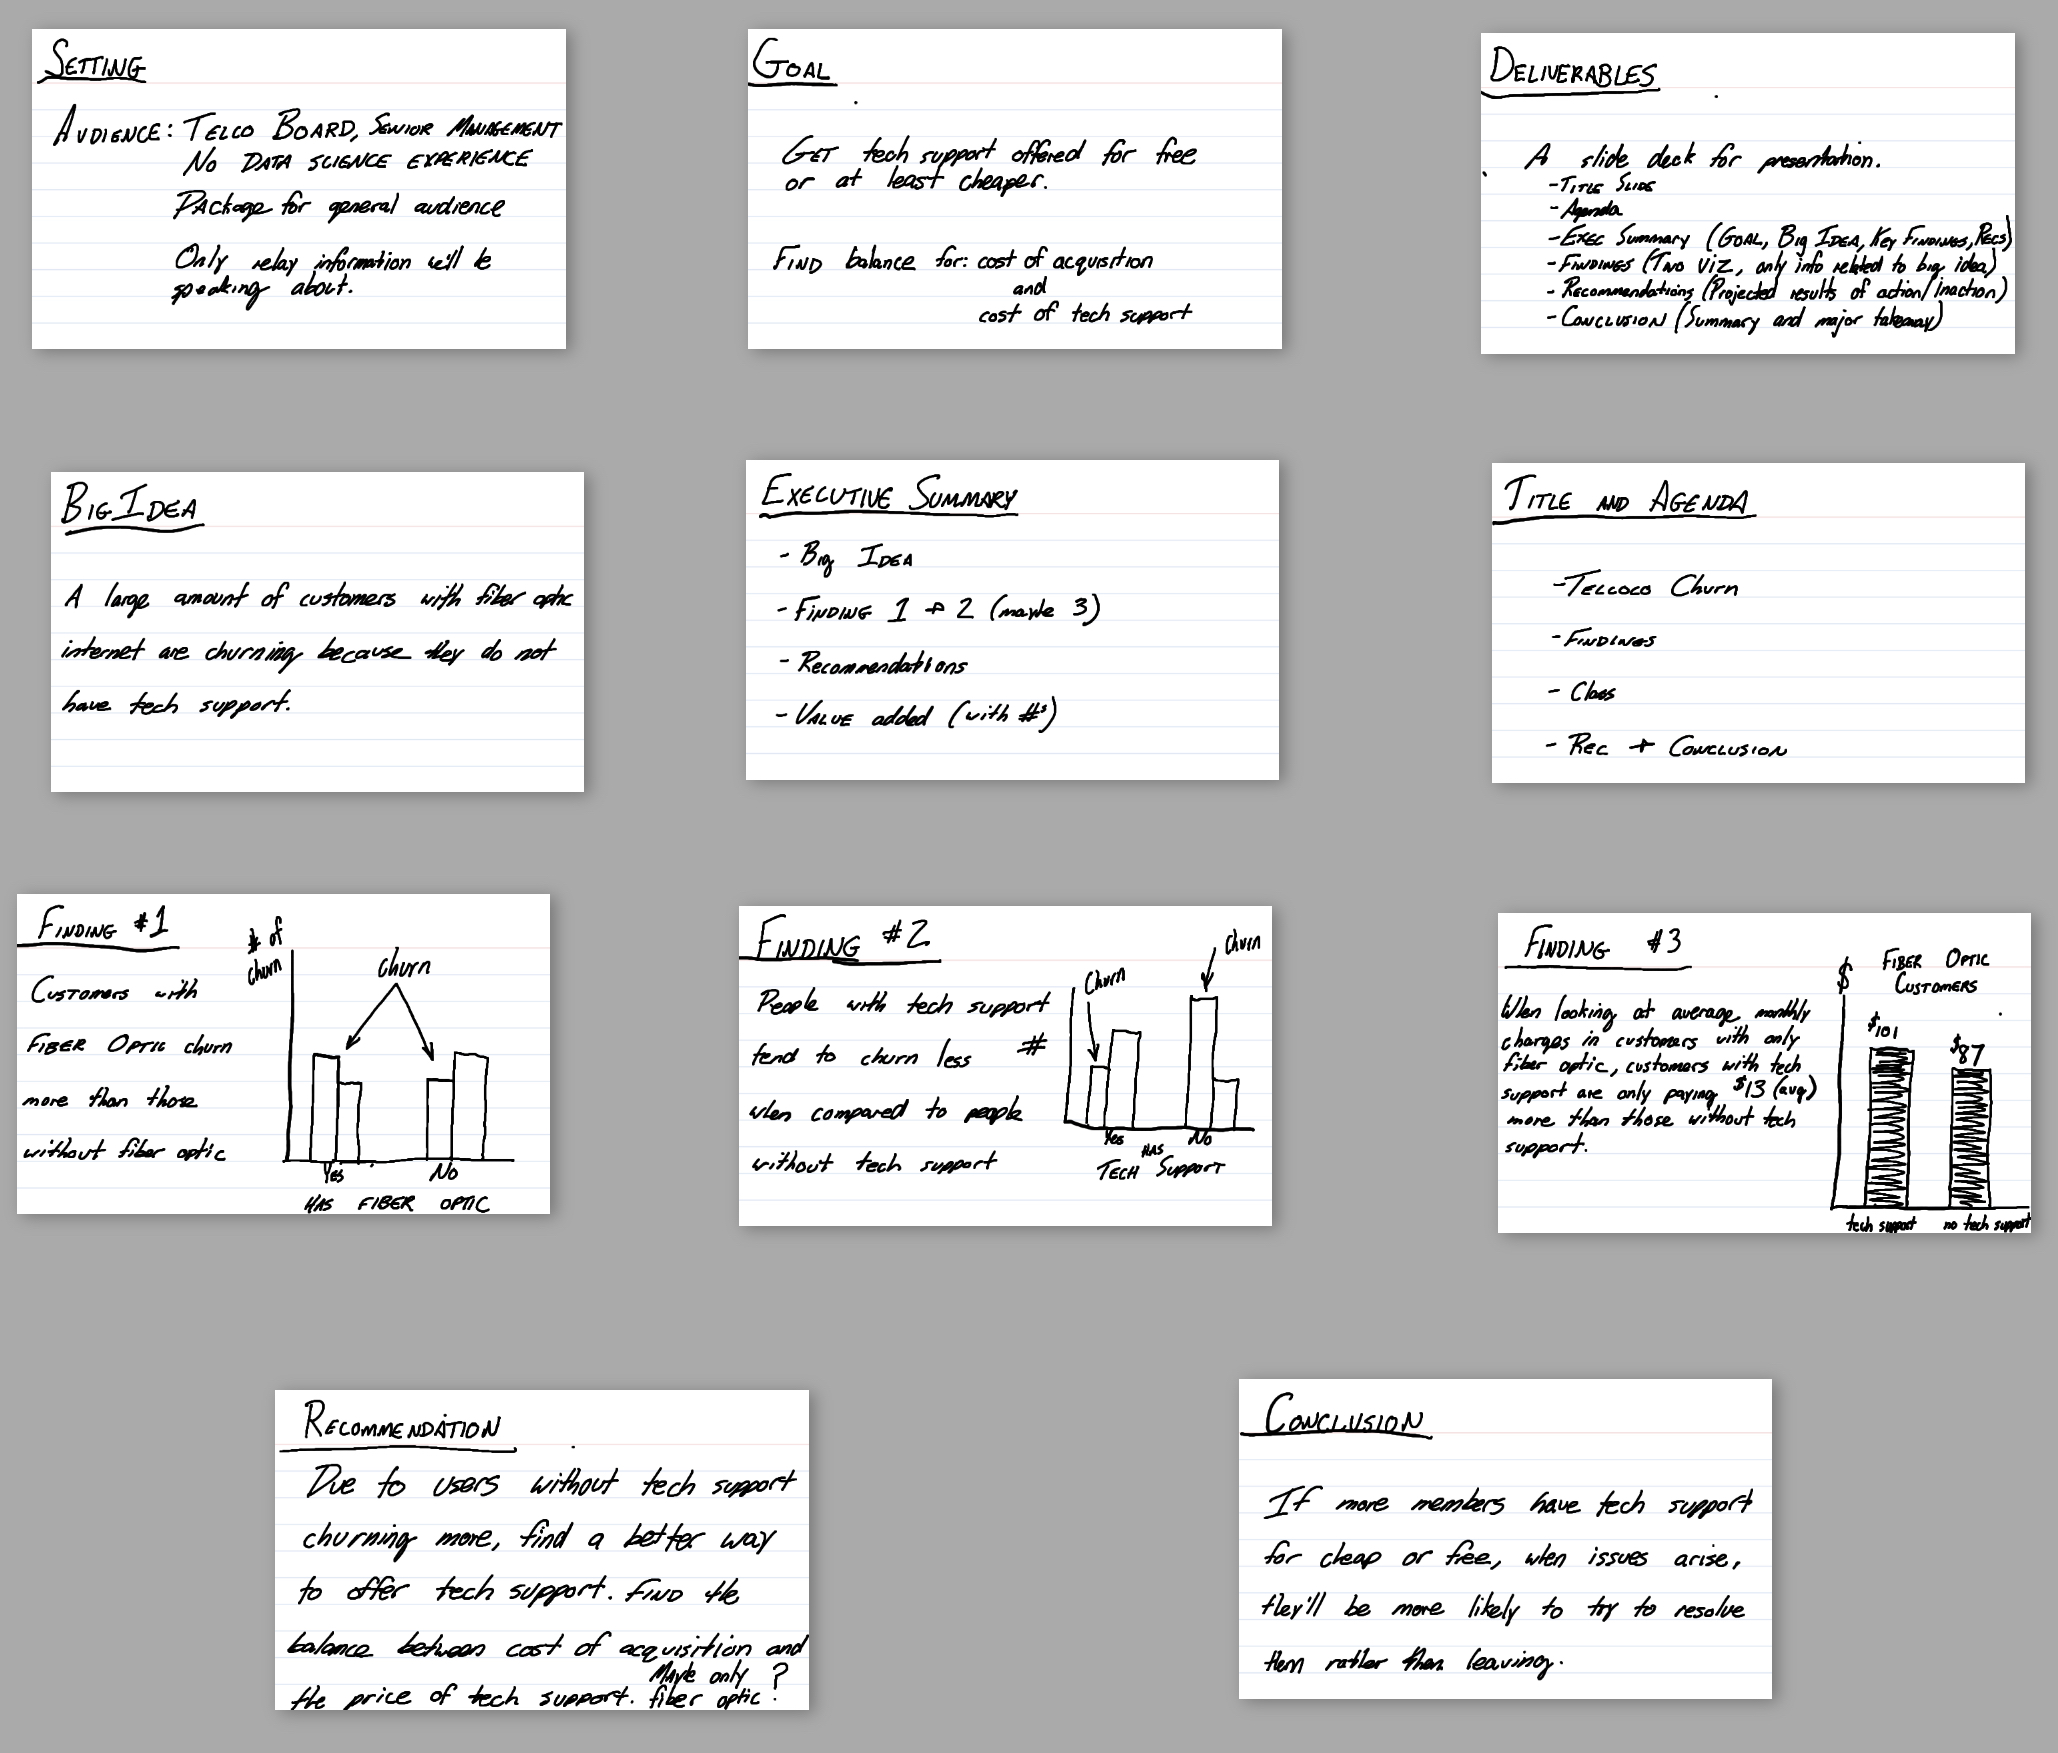

# Visuals and Math for Presentation

In [1]:
import prepare as p
import explore as e
import pandas as pd
import matplotlib.pyplot as plt

# Get the data from CSV named telco
telco = p.get_telco_data()

# Clean 'er up.
p.prep_telco(telco)

# Make it fiber optic only
fiber = telco[telco['internet_service_type'] == 'Fiber optic']

# Make it no tech support only
support = telco[telco['tech_support'] == 'No']

CSV Found


## Validation Math

In [21]:
# Do some math

# Total Churn Rate
total_churn_counts = telco['churn'].value_counts(normalize=True)

# Support Churn Rate
support_churn_counts = support['churn'].value_counts(normalize=True)

# Fiber Churn Rate
fiber_churn_counts = fiber['churn'].value_counts(normalize=True)

# Calculate the average value for tech_support == 'No' and 'Yes'
avg_no_tech_support = fiber[fiber['tech_support'] == 'No']['monthly_charges'].mean()
avg_yes_tech_support = fiber[fiber['tech_support'] == 'Yes']['monthly_charges'].mean()

# Calculate the churn rate in people without tech_support
no_tech_support_df = fiber[fiber['tech_support'] == 'No']
no_tech_support_churn_rate = no_tech_support_df['churn'].value_counts(normalize=True)['Yes']

# Calculate the churn rate in people with tech_support
tech_support_df = fiber[fiber['tech_support'] == 'Yes']
tech_support_churn_rate = tech_support_df['churn'].value_counts(normalize=True)['Yes']


print(f'The churn rate of Telco: {total_churn_counts}\n')
print(f'The churn rate of Fiber at Telco: {fiber_churn_counts}\n')
print(f'The churn rate of Not Having Tech Support at Telco: {support_churn_counts}\n')
print(f"The average fiber optic monthly charges WITHOUT tech support is {avg_no_tech_support:.2f}")
print(f"The average fiber optic monthly charges WITH tech support is {avg_yes_tech_support:.2f}\n")
print(f"The churn rate in fiber optic customers WITHOUT tech_support is {no_tech_support_churn_rate:.2%}")
print(f"The churn rate in fiber optic customers WITH tech_support is {tech_support_churn_rate:.2%}\n")
print(f'The potential retention increase if fiber optic customers WITHOUT tech_support GET tech support is: {no_tech_support_churn_rate - tech_support_churn_rate:.2%}')

The churn rate of Telco: churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

The churn rate of Fiber at Telco: churn
No     0.581072
Yes    0.418928
Name: proportion, dtype: float64

The churn rate of Not Having Tech Support at Telco: churn
No     0.583645
Yes    0.416355
Name: proportion, dtype: float64

The average fiber optic monthly charges WITHOUT tech support is 87.74
The average fiber optic monthly charges WITH tech support is 101.18

The churn rate in fiber optic customers WITHOUT tech_support is 49.37%
The churn rate in fiber optic customers WITH tech_support is 22.63%

The potential retention increase if fiber optic customers WITHOUT tech_support GET tech support is: 26.74%


## Viz the Math

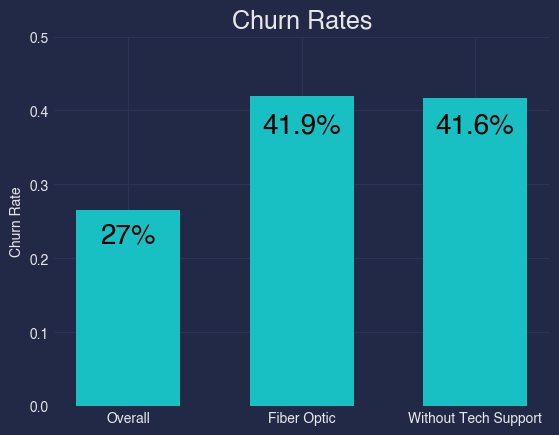

In [67]:
import matplotlib.pyplot as plt

# Calculate the total number of customers in each dataframe
total_telco = len(telco)
total_fiber = len(fiber)
total_support = len(support)

# Calculate the number of customers who churned in each dataframe
telco_churned = telco[telco['churn'] == 'Yes']
fiber_churned = fiber[fiber['churn'] == 'Yes']
support_churned = support[support['churn'] == 'Yes']

# Calculate the churn rate for each dataframe
telco_churn_rate = len(telco_churned) / total_telco
fiber_churn_rate = len(fiber_churned) / total_fiber
support_churn_rate = len(support_churned) / total_support

# Create a grouped bar plot of the churn rates
bar_width = 0.6  # Increase the width of the bars
plt.bar([0, 1, 2], [telco_churn_rate, fiber_churn_rate, support_churn_rate], width=bar_width, label='Churn Rate')
plt.xticks([0, 1, 2], ['Overall', 'Fiber Optic', 'Without Tech Support'])
plt.title('Churn Rates', fontsize=18)
plt.ylabel('Churn Rate')
plt.ylim(0, 0.5)

# Add text to the first column of the plot
plt.text(0, 0.23, f'{telco_churn_rate:.0%}', ha='center', va='center', fontsize=20, color='black')

# Add text to the second column of the plot
plt.text(1, 0.38, f'{fiber_churn_rate:.1%}', ha='center', va='center', fontsize=20, color='black')

# Add text to the third column of the plot
plt.text(2, 0.38, f'{support_churn_rate:.1%}', ha='center', va='center', fontsize=20, color='black')

# Show the plot
plt.show()

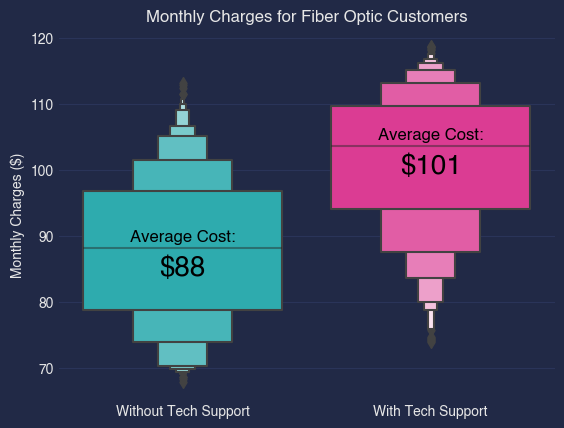

In [64]:
import seaborn as sns
from scipy import stats

# # Calculate the average monthly charges
# average = fiber['monthly_charges'].mean()

# Create a boxen plot with the tech_support variable on the x-axis and the monthly cost on the y-axis
sns.boxenplot(data=fiber, x='tech_support', y='monthly_charges')

# Add a title to the plot with the name of the quantitative variable
plt.title('Monthly Charges for Fiber Optic Customers')

# # Add a horizontal line to the plot at the average value of the quantitative variable
# plt.axhline(average, ls="--")

# Change the x-axis labels
plt.xticks([0, 1], ['Without Tech Support', 'With Tech Support'])
plt.xlabel('')

# Change the y-axis label
plt.ylabel('Monthly Charges ($)')

# Average cost
avg_no_tech_support = fiber[fiber['tech_support'] == 'No']['monthly_charges'].mean()
avg_yes_tech_support = fiber[fiber['tech_support'] == 'Yes']['monthly_charges'].mean()

# Add text to the first column of the plot
plt.text(0, 88.5, f'Average Cost:\n', ha='center', va='center', fontsize=12, color='black')
plt.text(0, 85, f'${avg_no_tech_support:.0f}', ha='center', va='center', fontsize=20, color='black')

# Add text to the second column of the plot
plt.text(1, 104, f'Average Cost:\n', ha='center', va='center', fontsize=12, color='black')
plt.text(1, 100.5, f'${avg_yes_tech_support:.0f}', ha='center', va='center', fontsize=20, color='black')

# Show the plot
plt.show()

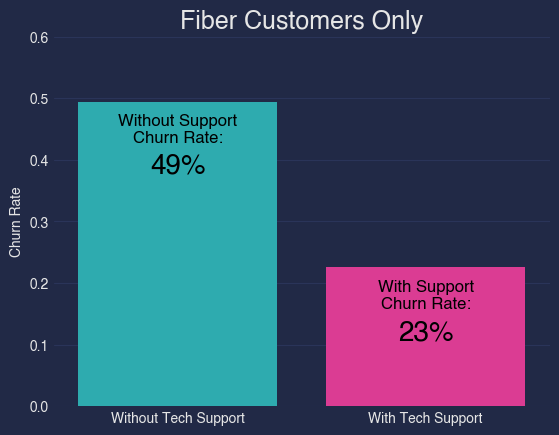

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot of the churn rates
sns.barplot(x=['Without Tech Support', 'With Tech Support'], y=[no_tech_support_churn_rate, tech_support_churn_rate])
plt.title('Fiber Customers Only', fontsize=18)
plt.ylabel('Churn Rate')
plt.ylim(0, 0.6)

# Calculate the churn rate in people without tech_support
no_tech_support_df = fiber[fiber['tech_support'] == 'No']
no_tech_support_churn_rate = no_tech_support_df['churn'].value_counts(normalize=True)['Yes']

# Calculate the churn rate in people with tech_support
tech_support_df = fiber[fiber['tech_support'] == 'Yes']
tech_support_churn_rate = tech_support_df['churn'].value_counts(normalize=True)['Yes']

# Add text to the first column of the plot
plt.text(0, 0.45, f'Without Support\nChurn Rate:', ha='center', va='center', fontsize=12, color='black')
plt.text(0, 0.39, f'{no_tech_support_churn_rate:.0%}', ha='center', va='center', fontsize=20, color='black')

# Add text to the second column of the plot
plt.text(1, 0.18, f'With Support\nChurn Rate:', ha='center', va='center', fontsize=12, color='black')
plt.text(1, 0.12, f'{tech_support_churn_rate:.0%}', ha='center', va='center', fontsize=20, color='black')

# Show the plot
plt.show()

## Not Used Graphs

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total number of customers in each dataframe
total_telco = len(telco)
total_support = len(support)

# Calculate the number of customers who churned in each dataframe
telco_churned = telco[telco['churn'] == 'Yes']
support_churned = support[support['churn'] == 'Yes']

# Calculate the churn rate for each dataframe
telco_churn_rate = len(telco_churned) / total_telco
support_churn_rate = len(support_churned) / total_support

# Create a bar plot of the churn rates
plt.bar(['Overall Churn Rate', 'Without Tech Support Churn Rate'], [telco_churn_rate, support_churn_rate])
plt.title('Churn Rates', fontsize=16)
plt.ylabel('Churn Rate')
plt.ylim(0, 0.5)

# Add text to the first column of the plot
plt.text(0, 0.21, f'Overall\nChurn Rate:\n', ha='center', va='center', fontsize=12, color='black')
plt.text(0, 0.15, f'{telco_churn_rate:.0%}', ha='center', va='center', fontsize=20, color='black')

# Add text to the second column of the plot
plt.text(1, 0.36, f'Without Tech Support\nChurn Rate:\n', ha='center', va='center', fontsize=12, color='black')
plt.text(1, 0.30, f'{support_churn_rate:.0%}', ha='center', va='center', fontsize=20, color='black')

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total number of customers in each dataframe
total_telco = len(telco)
total_fiber = len(fiber)

# Calculate the number of customers who churned in each dataframe
telco_churned = telco[telco['churn'] == 'Yes']
fiber_churned = fiber[fiber['churn'] == 'Yes']

# Calculate the churn rate for each dataframe
telco_churn_rate = len(telco_churned) / total_telco
fiber_churn_rate = len(fiber_churned) / total_fiber

# Create a bar plot of the churn rates
plt.bar(['Overall Churn Rate', 'Telco (Fiber Only) Churn Rate'], [telco_churn_rate, fiber_churn_rate])
plt.title('Churn Rates', fontsize=16)
plt.ylabel('Churn Rate')
plt.ylim(0, 0.5)

# Add text to the first column of the plot
plt.text(0, 0.20, f'Overall\nChurn Rate:\n', ha='center', va='center', fontsize=12, color='black')
plt.text(0, 0.13, f'{telco_churn_rate:.0%}', ha='center', va='center', fontsize=20, color='black')

# Add text to the second column of the plot
plt.text(1, 0.20, f'Fiber Only\nChurn Rate:\n', ha='center', va='center', fontsize=12, color='black')
plt.text(1, 0.13, f'{fiber_churn_rate:.0%}', ha='center', va='center', fontsize=20, color='black')

# Show the plot
plt.show()